In [1]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os

%matplotlib inline
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3
from keras import backend as K
import random
import urllib.request
import matplotlib.image as mpimg

from skimage.filters import rank, threshold_otsu
from skimage import io
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.datasets import load_files
from tqdm import tqdm
from collections import Counter
from skimage.morphology import closing, square, disk
#to see full text:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from termcolor import colored
print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Loading the DATA

In [3]:
dataset_path_train = os.listdir('/content/drive/MyDrive/data (3)/dataset')
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Types of classes labels found:  4


In [4]:
class_labels = []

for item in dataset_path_train:
 #
 all_classes = os.listdir('/content/drive/MyDrive/data (3)/dataset' + '/' +item+'/')
 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))


In [5]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
df.head()

,Labels,image
0,cataract,dataset_path/cataract/1460_right.jpg
1,cataract,dataset_path/cataract/2101_left.jpg
2,cataract,dataset_path/cataract/2107_left.jpg
3,cataract,dataset_path/cataract/2110_right.jpg
4,cataract,dataset_path/cataract/2103_left.jpg


In [6]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

In [7]:
data_dir = pathlib.Path("/content/drive/MyDrive/data (3)/dataset")
train_ds = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        image_size=IMG_SIZE,
                                        validation_split=0.2,
                                        subset='training')
val_ds = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=IMG_SIZE,
                                      validation_split=0.2,
                                      subset='validation',)

Found 4266 files belonging to 4 classes.
Using 3413 files for training.
Found 4266 files belonging to 4 classes.
Using 853 files for validation.


#3. Model Building

In [8]:
input_shape=(256,256,3)
batch_size=64
classes=4

In [9]:
from tensorflow.keras.applications import DenseNet121
dense = DenseNet121(weights = "imagenet", include_top = False, input_shape=(256,256,3))

29084464/29084464 [==============================] - 0s 0us/step


In [10]:
for layer in dense.layers[:121]:
    layer.trainable = False

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "sigmoid"))

In [12]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
patience = 1
stop_patience = 3
factor = 0.5
#tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("densenet121.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)]

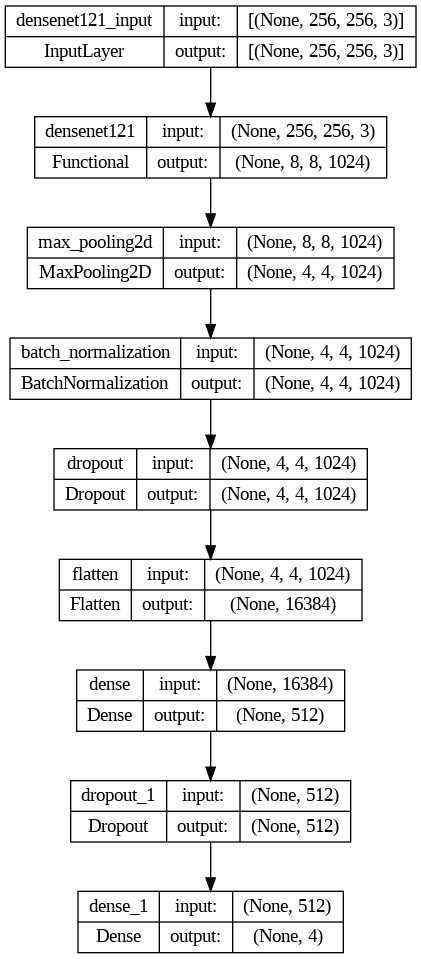

In [14]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-plant.png', show_shapes=True)

In [15]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 15, verbose = 1, callbacks = callbacks)

Epoch 1/15
107/107 [==============================] - 1944s 17s/step - loss: 2.1557 - accuracy: 0.6458 - val_loss: 28.8215 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 1806s 17s/step - loss: 0.6277 - accuracy: 0.8110 - val_loss: 16.7283 - val_accuracy: 0.5651 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - 1792s 17s/step - loss: 0.5946 - accuracy: 0.8497 - val_loss: 1.0986 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 4/15
107/107 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.8702 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
107/107 [==============================] - 1769s 17s/step - loss: 0.5225 - accuracy: 0.8702 - val_loss: 10.7864 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 5/15
107/107 [==============================] - 1752s 16s/step - loss: 0.3941 - accuracy: 0.8975 - val_loss: 0.3175 - val_accuracy: 0.9109 - lr: 5.0000e-04
Epoch 6/15
107/107 [=====================

In [16]:
model.save("Modeleye.h5")

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

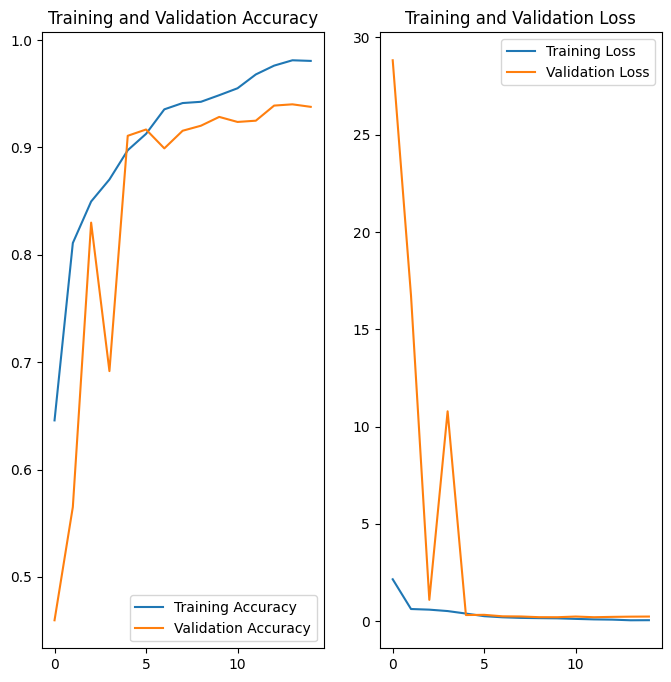

In [17]:
epochs=15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
preformance = model.evaluate(val_ds)

27/27 [==============================] - 177s 6s/step - loss: 0.2401 - accuracy: 0.9379


['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

actual label: normal
1/1 [==============================] - 10s 10s/step
predicted label: normal


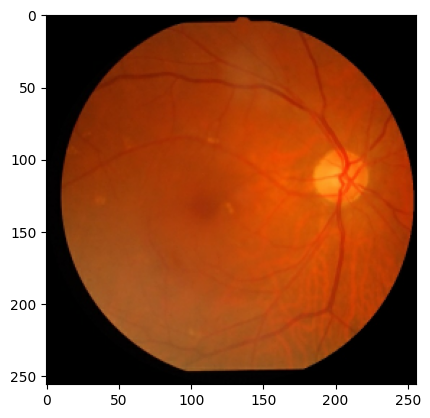

In [19]:
labels = train_ds.class_names
labels
for images_batch, labels_batch in val_ds.take(1):

    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()

    plt.imshow(image)
    print("actual label:", labels[label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [20]:
from tensorflow import expand_dims, newaxis

def predict(model, img):

    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)

    return predicted_class, confidence

<Figure size 1500x1500 with 0 Axes>

<Axes: >

1/1 [==============================] - 3s 3s/step


Text(0.5, 1.0, 'Actual: glaucoma,\n Predicted: glaucoma.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 212ms/step


Text(0.5, 1.0, 'Actual: diabetic_retinopathy,\n Predicted: diabetic_retinopathy.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 187ms/step


Text(0.5, 1.0, 'Actual: cataract,\n Predicted: cataract.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 207ms/step


Text(0.5, 1.0, 'Actual: cataract,\n Predicted: cataract.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 310ms/step


Text(0.5, 1.0, 'Actual: cataract,\n Predicted: cataract.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 342ms/step


Text(0.5, 1.0, 'Actual: normal,\n Predicted: normal.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 367ms/step


Text(0.5, 1.0, 'Actual: cataract,\n Predicted: cataract.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 335ms/step


Text(0.5, 1.0, 'Actual: normal,\n Predicted: glaucoma.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

<Axes: >

1/1 [==============================] - 0s 321ms/step


Text(0.5, 1.0, 'Actual: diabetic_retinopathy,\n Predicted: diabetic_retinopathy.\n Confidence: 1.0%')

(-0.5, 255.5, 255.5, -0.5)

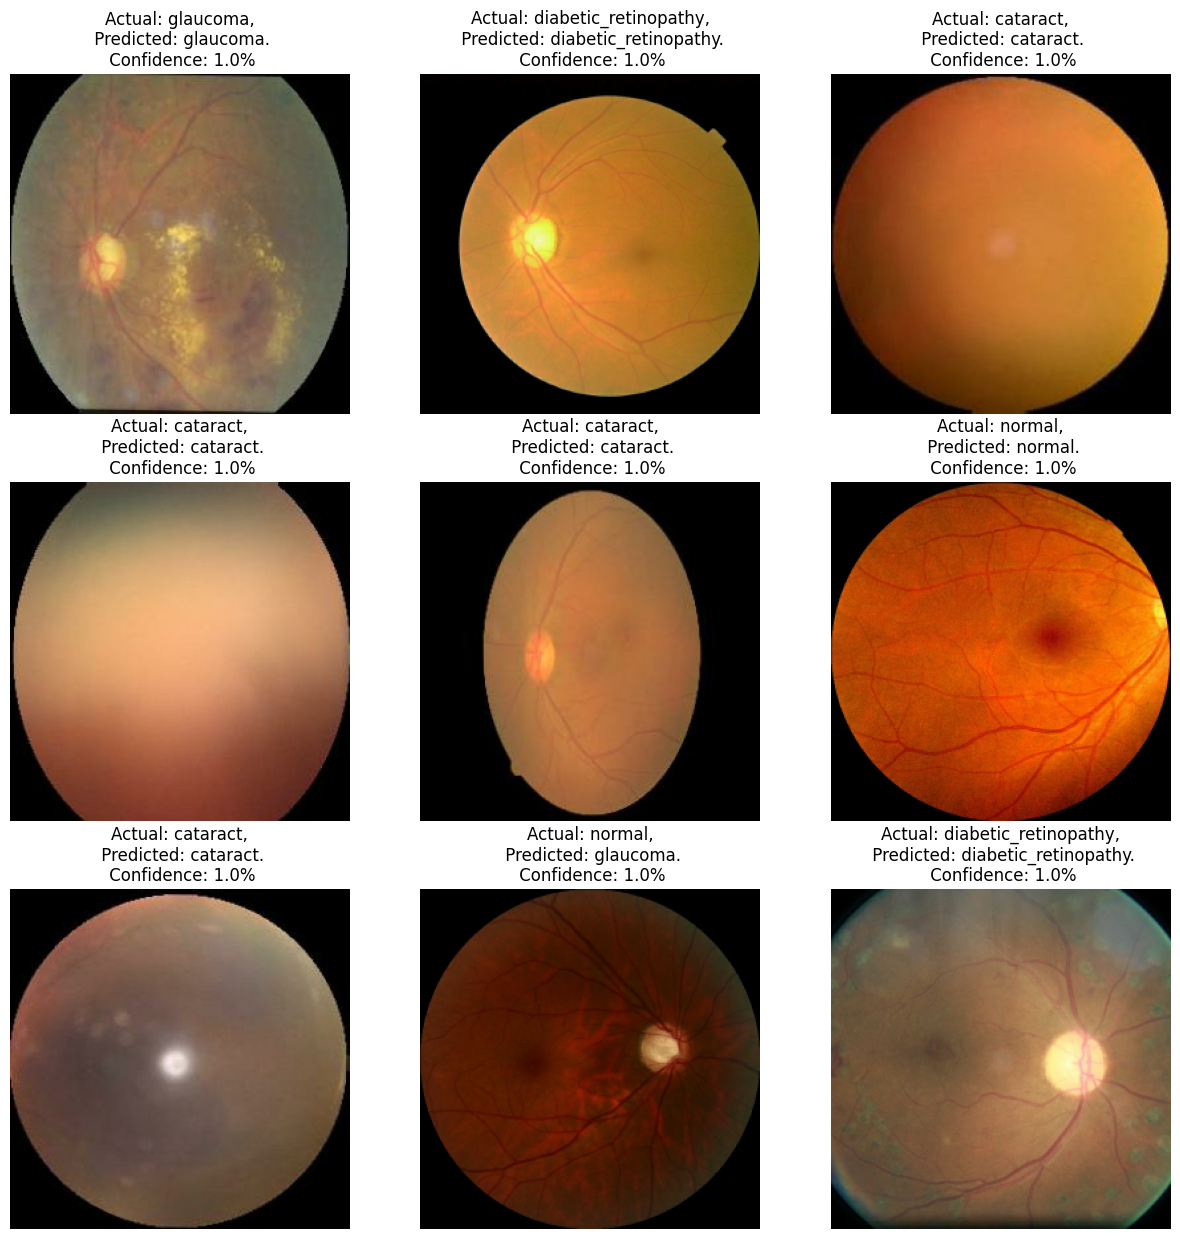

In [21]:
plt.figure(figsize=(15, 15))

for images, lbs in val_ds.take(1):
    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")